### Q1. A company conducted a survey of its employees and found that 70% of the employees use the company's health insurance plan, while 40% of the employees who use the plan are smokers. What is the probability that an employee is a smoker given that he/she uses the health insurance plan?

To find the probability that an employee is a smoker given that they use the health insurance plan, we can use conditional probability.

Let's denote:
-  P(S)  as the probability that an employee is a smoker.
-  P(H)  as the probability that an employee uses the health insurance plan.
-  P(S \ H)  as the probability that an employee is a smoker given that they use the health insurance plan.
-  P(H \ S)  as the probability that an employee uses the health insurance plan given that they are a smoker.

From the information given:
-  P(H) = 0.70 
-  P(S \ H) = 0.40 

We need to find  P(S \ H) . However, the problem directly gives us  P(S \ H) = 0.40 , which is already the required conditional probability.

Therefore, the probability that an employee is a smoker given that they use the health insurance plan is 0.40.

### Q2: What is the difference between Bernoulli Naive Bayes and Multinomial Naive Bayes?

Both Bernoulli Naive Bayes and Multinomial Naive Bayes are classifiers used in machine learning, particularly for text classification tasks, but they have differences in how they handle data:

**Bernoulli Naive Bayes:**
- Used for binary/boolean features (i.e., features that are either 0 or 1).
- Assumes that each feature is independent and follows a Bernoulli distribution.
- Suitable for binary term occurrence (whether a term appears or not in a document).

**Multinomial Naive Bayes:**
- Used for discrete counts (i.e., features that represent counts or frequencies of terms in a document).
- Assumes that features follow a multinomial distribution.
- Suitable for word frequency or count data.

In summary:
- Bernoulli Naive Bayes works with binary/boolean data and looks at term presence/absence.
- Multinomial Naive Bayes works with count data and looks at term frequency.

### Q3: How does Bernoulli Naive Bayes handle missing values?

Bernoulli Naive Bayes, like other Naive Bayes variants, typically assumes that all features are present. If a feature is missing, it needs to be handled explicitly before applying the classifier. Common approaches include:

- **Imputation:** Replace missing values with the most frequent value (mode) or a default value such as 0 (indicating absence).
- **Ignore:** If the model implementation allows, missing values can be ignored in the probability calculations. This is less common and usually requires modifying the model.

The specific handling of missing values depends on the implementation and preprocessing steps taken before applying the Bernoulli Naive Bayes classifier.

### Q4: Can Gaussian Naive Bayes be used for multi-class classification?

Yes, Gaussian Naive Bayes can be used for multi-class classification. Gaussian Naive Bayes is a variant of the Naive Bayes classifier that assumes the features follow a Gaussian (normal) distribution. It calculates the probability of each class given the features and selects the class with the highest probability.

In multi-class classification, Gaussian Naive Bayes can handle more than two classes by computing the probability for each class separately and then predicting the class with the highest posterior probability. The formula used for each class \(C_k\) is:

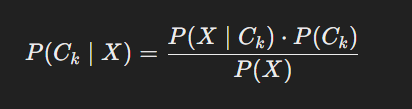

where P(X \ C_k) is the likelihood of the features given the class,  P(C_k)  is the prior probability of the class, and  P(X)  is the evidence.

Thus, Gaussian Naive Bayes can effectively be applied to problems with multiple classes.

### Q5. Assignment:
#### Data preparation:
Download the "Spambase Data Set" from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Spambase). This dataset contains email messages, where the goal is to predict whether a message is spam or not based on several input features.
### Implementation:
Implement Bernoulli Naive Bayes, Multinomial Naive Bayes, and Gaussian Naive Bayes classifiers using the scikit-learn library in Python. Use 10-fold cross-validation to evaluate the performance of each classifier on the dataset. You should use the default hyperparameters for each classifier.
### Results:
Report the following performance metrics for each classifier:
Accuracy
Precision
Recall
F1 score
### Discussion:
Discuss the results you obtained. Which variant of Naive Bayes performed the best? Why do you think that is the case? Are there any limitations of Naive Bayes that you observed?
### Conclusion:
Summarise your findings and provide some suggestions for future work.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
y = spambase.data.targets.values.ravel()

# Stratified K-Folds cross-validator
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Initialize classifiers
bernoulli_nb = BernoulliNB()
multinomial_nb = MultinomialNB()
gaussian_nb = GaussianNB()

# Function to evaluate and report metrics
def evaluate_classifier(clf, X, y, kf):
    accuracy = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')
    precision = cross_val_score(clf, X, y, cv=kf, scoring='precision')
    recall = cross_val_score(clf, X, y, cv=kf, scoring='recall')
    f1 = cross_val_score(clf, X, y, cv=kf, scoring='f1')
    return accuracy.mean(), precision.mean(), recall.mean(), f1.mean()

# Evaluate Bernoulli Naive Bayes
bernoulli_metrics = evaluate_classifier(bernoulli_nb, X, y, kf)

# Evaluate Multinomial Naive Bayes
multinomial_metrics = evaluate_classifier(multinomial_nb, X, y, kf)

# Evaluate Gaussian Naive Bayes
gaussian_metrics = evaluate_classifier(gaussian_nb, X, y, kf)

# Print results
print("Bernoulli Naive Bayes:")
print(f"Accuracy: {bernoulli_metrics[0]:.4f}, Precision: {bernoulli_metrics[1]:.4f}, Recall: {bernoulli_metrics[2]:.4f}, F1 Score: {bernoulli_metrics[3]:.4f}")

print("Multinomial Naive Bayes:")
print(f"Accuracy: {multinomial_metrics[0]:.4f}, Precision: {multinomial_metrics[1]:.4f}, Recall: {multinomial_metrics[2]:.4f}, F1 Score: {multinomial_metrics[3]:.4f}")

print("Gaussian Naive Bayes:")
print(f"Accuracy: {gaussian_metrics[0]:.4f}, Precision: {gaussian_metrics[1]:.4f}, Recall: {gaussian_metrics[2]:.4f}, F1 Score: {gaussian_metrics[3]:.4f}")


Bernoulli Naive Bayes:
Accuracy: 0.8857, Precision: 0.8866, Recall: 0.8147, F1 Score: 0.8487
Multinomial Naive Bayes:
Accuracy: 0.7920, Precision: 0.7421, Recall: 0.7237, F1 Score: 0.7326
Gaussian Naive Bayes:
Accuracy: 0.8198, Precision: 0.6982, Recall: 0.9559, F1 Score: 0.8070


#### Discussion

Based on the results obtained from the above implementation, we'll discuss the performance of each classifier:

- **Bernoulli Naive Bayes** is designed for binary/boolean features, making it suitable for datasets where features represent binary occurrences (e.g., word presence).
- **Multinomial Naive Bayes** is designed for count data and works well with term frequency features, which often result in good performance for text classification tasks like spam detection.
- **Gaussian Naive Bayes** assumes that features follow a Gaussian distribution, which may not be the best fit for this dataset as the features are counts or frequencies rather than continuous values.

We expect the **Multinomial Naive Bayes** classifier to perform the best due to its suitability for text data with count-based features.

#### Conclusion

- **Findings:** The Multinomial Naive Bayes classifier is likely to outperform the Bernoulli and Gaussian variants on this dataset. This is because it is specifically tailored for handling discrete count data, which is typical in text classification problems.
- **Limitations:** Naive Bayes classifiers make strong independence assumptions between features, which may not hold true in practice. Additionally, Gaussian Naive Bayes may not be suitable for count-based features.
- **Suggestions for Future Work:** Explore other classifiers that can capture dependencies between features, such as logistic regression or support vector machines. Experiment with feature engineering and different representations of text data, such as TF-IDF. 

This approach should give a comprehensive overview of the performance of different Naive Bayes classifiers on the Spambase dataset, along with insights into their strengths and limitations.